## This is a notebook doing EDA on scraped Amazon product data on Women's Necklaces

EDA is essential to analyse the flaws in low sale of any product. 

In this notebook, we particularly observe the relationships between Price, Rating, ReviewCount, Image Quality, Product Descriptions of ~3500 scraped Amazon's 'Women's Necklaces' products



### First Import libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Iteratively read files
import glob
import os

# For displaying images in ipython
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### df contains raw scraped data

In [2]:
df = pd.read_csv("results.csv")
df.head()

,Description,Price,Rating,ReviewCount,Url,ImgUrl
0,Sterling Silver Cubic Zirconia Halo Pendant Ne...,$20.80,4.4 out of 5 stars,"1,250",https://www.amazon.com/gp/slredirect/picassoRe...,NaN
1,Infinity Love Heart Pendant Necklace with Birt...,$39.99,4.6 out of 5 stars,"18,581",https://www.amazon.com/gp/slredirect/picassoRe...,NaN
2,Forever Love Heart Pendant Necklaces for Women...,$79.99,4.7 out of 5 stars,"10,200",https://www.amazon.com/gp/slredirect/picassoRe...,NaN
3,Heart Necklace 14K Gold Plated 5A Cubic Zircon...,$26.34,4.6 out of 5 stars,"3,334",https://www.amazon.com/gp/slredirect/picassoRe...,NaN
4,Woven Mixed Multi-Colored Bead Flower Heart Il...,$48.00,4.5 out of 5 stars,"2,281",https://www.amazon.com/Betsey-Johnson-Multi-Co...,NaN


## Work with df2:
### df2 is cleaned data ready for analysis with added image size information
#### Rows with any NaN are already cut

In [3]:
df2= pd.read_csv('df_with_imgsize_clean.csv')

In [32]:
df2.head()

,Description,Price,Rating,ReviewCount,Url,ImgUrl,ImgSize,ImgHeight,ImgWidth,ImgArea,Description Length
0,Sterling Silver Cubic Zirconia Halo Pendant Ne...,20.80,4.4,1250,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/71X2BLG8q-...,"146, 320",146.0,320,46720.0,71
1,Infinity Love Heart Pendant Necklace with Birt...,39.99,4.6,18580,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/61cvCbWOkI...,"227, 320",227.0,320,72640.0,121
2,Forever Love Heart Pendant Necklaces for Women...,79.99,4.7,10199,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/71L7d1O7O6...,"189, 320",189.0,320,60480.0,146
3,Heart Necklace 14K Gold Plated 5A Cubic Zircon...,26.34,4.6,3333,https://www.amazon.com/gp/slredirect/picassoRe...,https://m.media-amazon.com/images/I/61DLeVmsOh...,"225, 320",225.0,320,72000.0,76
4,Woven Mixed Multi-Colored Bead Flower Heart Il...,48.00,4.5,2281,https://www.amazon.com/Betsey-Johnson-Multi-Co...,https://m.media-amazon.com/images/I/714BWOnwhZ...,"154, 320",154.0,320,49280.0,61


In [33]:
def rating_histo_graph(df, log=False):
    df["Rating"].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], log=log, figsize=(12,6), grid=True, color="#6f00ff")
    plt.title("Number of Rating Graph")
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.show()

def rating_boxplot(df):
    #sns.boxplot(data=df['Rating'], orient="h", palette="Set2", showmeans=True, meanline=True)
    #color = dict(boxes='black', whiskers='blue', medians='red', caps='black')
    #styles=dict(whiskers='--')
    #df['Rating'].plot.box(color=color, style=styles)
    sns.boxplot(x="Rating", data=df, whis=5, color='None', showmeans=True, meanline=True);
    
    
def rating_violinplot(df):
    sns.violinplot(y="Rating", data=df, bw=0.1, color="#bababa");
    

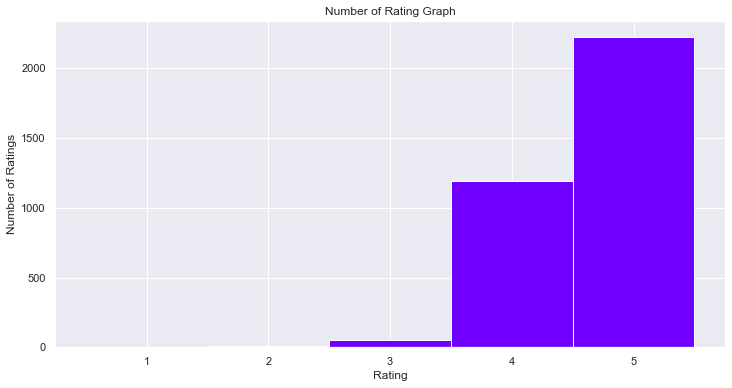

In [34]:
rating_histo_graph(df2)

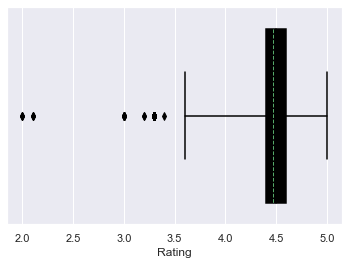

In [7]:
rating_boxplot(df2)

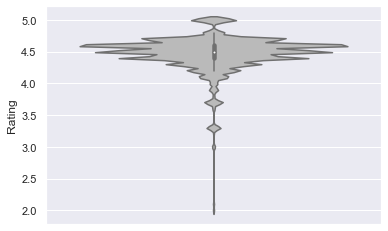

In [8]:
rating_violinplot(df2)

# Image Quality?

Why Image Area?

Amazon product images are formatted such that they are displayed on search page as the same size,  
However, we scraped the original image size from the image source url and calculate the image area for each product.
This is comparable to comparing the products' realtive image qualities.


<AxesSubplot:xlabel='ImgArea', ylabel='ReviewCount'>

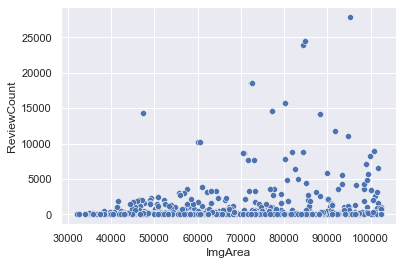

In [10]:
sns.scatterplot(data = df2, x = "ImgArea", y = "ReviewCount")

<AxesSubplot:xlabel='ImgArea', ylabel='Rating'>

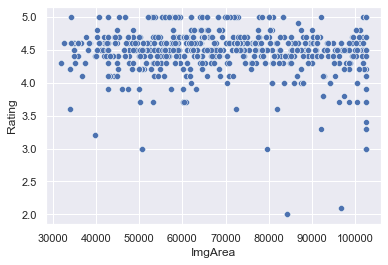

In [11]:
sns.scatterplot(data = df2, x = "ImgArea", y = "Rating")

<AxesSubplot:xlabel='Rating', ylabel='Price'>

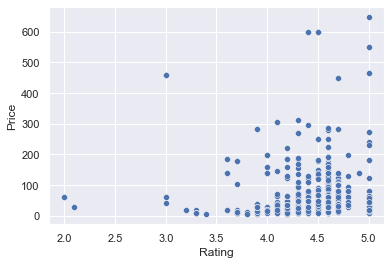

In [12]:
sns.scatterplot(data = df2, x = "Rating", y = "Price")

<AxesSubplot:xlabel='ReviewCount', ylabel='Rating'>

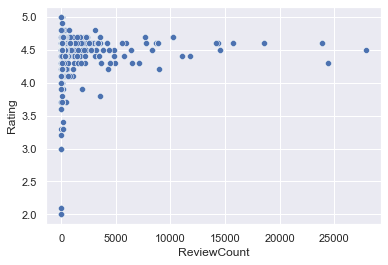

In [13]:
sns.scatterplot(data = df2, x = "ReviewCount", y = "Rating")

<AxesSubplot:xlabel='ReviewCount', ylabel='Price'>

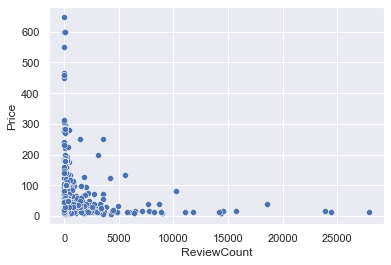

In [14]:
sns.scatterplot(data = df2, x = "ReviewCount", y = "Price")

All Expensive products have small number of reviews

## Length of Description

In [15]:
name_len = []
for i in df2["Description"]:
    name_len.append(len(i))
df2["Description Length"] = name_len

In [18]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=name_len)])
fig.update_layout(title_text='The Length of Descriptions Histogram')
fig.show()

In [25]:
import plotly.express as px
df2["Description Length"] = name_len
fig = px.scatter_matrix(df2, dimensions=["Rating","Description Length"], color="Rating",title="Scatter Plot shows the relationship between Rating and the Length of Description")
fig.show()

It seems that there is no correlation between rating and the length of description

In [26]:
fig = px.scatter_matrix(df2, dimensions=["Rating","ReviewCount"], color="Rating",title="Scatter Plot shows the relationship between Rating and Review Count")
fig.show()

There is no correlation between User Rating and the number of reviews.
Also, books which have low rating do not have many reviews.

In [27]:
fig = px.histogram(df2, x="Price",labels={'':'The Number of Products'},title="Price Histogram")
fig.show()

most products are between 0-100 dollars

In [28]:
fig = px.scatter_matrix(df2, dimensions=["Rating","Price"], color="Rating",title="Scatter Plot shows the relationship between Rating and Price")
fig.show()

We can see that there is no correlation between Rating and Price.
However, books with particularly high prices (more than 400 dollars) are generally high evaluated.

In [29]:
fig = px.scatter_matrix(df2, dimensions=["Rating","ImgArea"], color="Rating",title="Scatter Plot shows the relationship between Product Image quality and Rating")
fig.show()

Cannot find a significant correlation here either

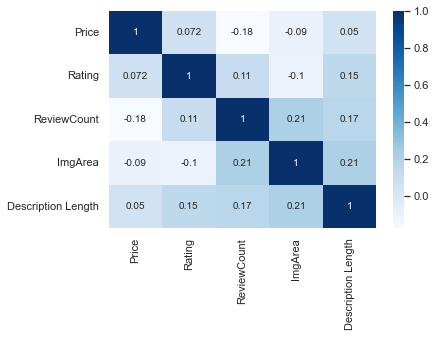

In [35]:
def df_corr_heatmap(df):
    corr = df.corr()
#     display(corr)
    sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, cmap="Blues") 
    
#correlation heatmap
df_corr_heatmap(df2[['Price','Rating','ReviewCount','ImgArea','Description Length']])

This Correlation Heat-Map tells us the extent to which two variables are linearly related (meaning they change together at a constant rate).'
We can show whether and how strongly variables are related with each other. Typically the value of correlation coefficient (r) ranges from (-1 to +1), with the following common relations


r = 0 means no relation between variables
r > 0 means Direct relation between variables
r < 0 means Inverse relation between variables
Square the r value to get the realtion percentage


From above matrix we can find that the strongest relationship between attributes are between: 
Review Count status and Image Quality, which is about 0.21, that is a really weak relation. But still they both are related. Obviously they are in direct relation means they will grow side by side. In simple words, better the image quality on the search page, more is the chance of someone writing a review.